# Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import genfromtxt

In [2]:
# Load data 
### Read csv file
### Load test and training data 

#Load csv file
df = pd.read_csv('project_train.csv')
df_test = pd.read_csv('project_test.csv')
#print(df)

In [3]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.533960,2.084912,5.150495,-21.746783,0.667327,0.104032,0.316158,0.186913,0.212621,0.473778,114.045600,0.500990
std,0.188161,32.635821,3.665736,290.809581,0.471638,0.113225,0.370039,0.344825,0.200281,0.268268,27.313063,0.500495
min,0.084900,0.009790,0.000000,-6542.000000,0.000000,0.022600,0.000024,0.000000,0.022400,0.024200,44.777000,0.000000
25%,0.371000,0.430000,1.000000,-9.844000,0.000000,0.036100,0.020100,0.000000,0.093400,0.237000,92.163000,0.000000
50%,0.557000,0.734000,5.000000,-5.852000,1.000000,0.046700,0.116000,0.000041,0.134000,0.474000,113.122000,1.000000
75%,0.686000,0.875000,8.000000,-4.436000,1.000000,0.135000,0.594000,0.085700,0.265000,0.699000,130.008000,1.000000
max,0.940000,734.000000,11.000000,4.331000,1.000000,0.925000,0.996000,0.994000,0.992000,0.969000,210.752000,1.000000


In [4]:
df_test.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.559613,0.683124,5.693333,-7.834880,0.613333,0.103161,0.229506,0.037075,0.232309,0.511425,119.250027
std,0.159323,0.228939,3.537343,4.562421,0.490266,0.104776,0.242360,0.159394,0.224458,0.238504,28.379643
min,0.136000,0.033400,0.000000,-27.654000,0.000000,0.023900,0.000021,0.000000,0.033700,0.075900,46.771000
25%,0.483500,0.575500,2.000000,-9.077500,0.000000,0.037950,0.034750,0.000000,0.094850,0.316000,98.994000
50%,0.557000,0.752000,6.000000,-6.653000,1.000000,0.050500,0.130000,0.000002,0.132000,0.517000,120.034000
75%,0.690500,0.860000,9.000000,-4.996000,1.000000,0.115500,0.382500,0.000499,0.298500,0.674000,138.534000
max,0.825000,0.995000,11.000000,-2.252000,1.000000,0.446000,0.968000,0.946000,0.987000,0.965000,174.209000


In [5]:
# Drop outliers in training data
df.drop(df.loudness.idxmin(), inplace=True)
df.drop(df.energy.idxmax(), inplace=True)
#df.drop(df.speechiness.idxmax(), inplace=True)

In [6]:
# Concat dataset
train_len = len(df)
dataset = pd.concat(objs=[df, df_test], axis=0).reset_index(drop=True)

In [7]:
# Chech missing values
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
Label               0
dtype: int64

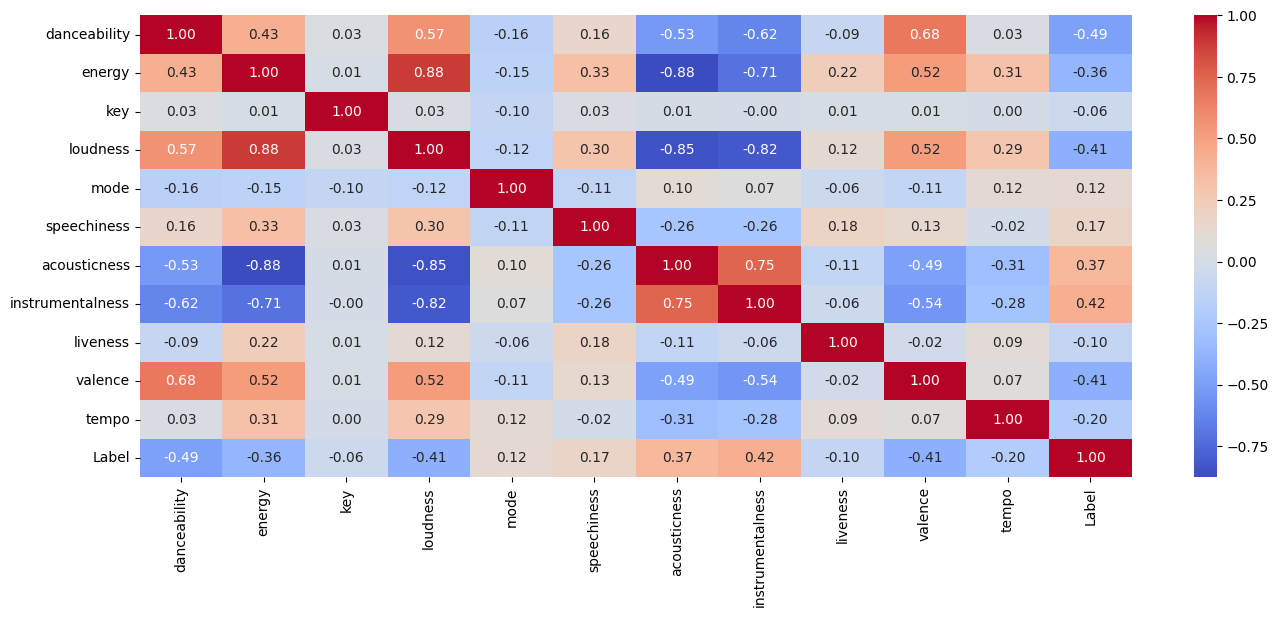

In [8]:
plt.figure(figsize=(16,6))
g = sns.heatmap(data=df.corr(), annot=True, fmt=".2f", cmap = "coolwarm")

In [9]:
#sns.pairplot(data=df, vars=df.columns[:-1], hue='Label')

/var/folders/3r/k6g9zpy93l3903kb2_270qnw0000gn/T/ipykernel_6413/2536183432.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset["liveness"], color="m", label="Skewness : %.2f"%(dataset["liveness"].skew()))


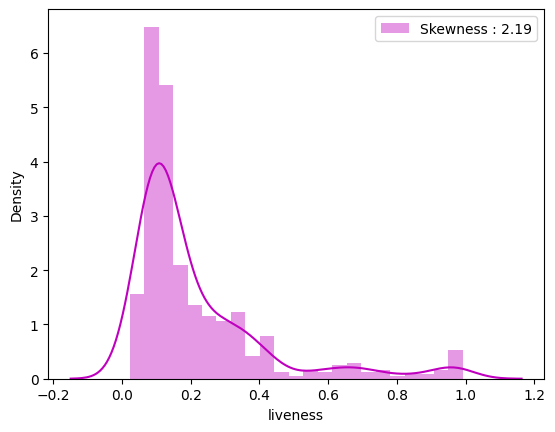

In [10]:
#Explore fair distribution 
g = sns.distplot(dataset["liveness"], color="m", label="Skewness : %.2f"%(dataset["liveness"].skew()))
g = g.legend(loc="best")

Very skewed, log-transform 

In [11]:
#dataset["liveness"] = dataset["liveness"].map(lambda i: np.log(i) if i > 0 else 0)
dataset['liveness_low'] = dataset['liveness'].map(lambda s: 1 if s <= 0.5 else 0)
dataset['liveness_high'] = dataset['liveness'].map(lambda s: 1 if s > 0.5 else 0)
dataset.drop(columns=['liveness'],inplace=True)

/var/folders/3r/k6g9zpy93l3903kb2_270qnw0000gn/T/ipykernel_6413/1428688661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset["liveness_low"], color="b", label="Skewness : %.2f"%(dataset["liveness_low"].skew()))


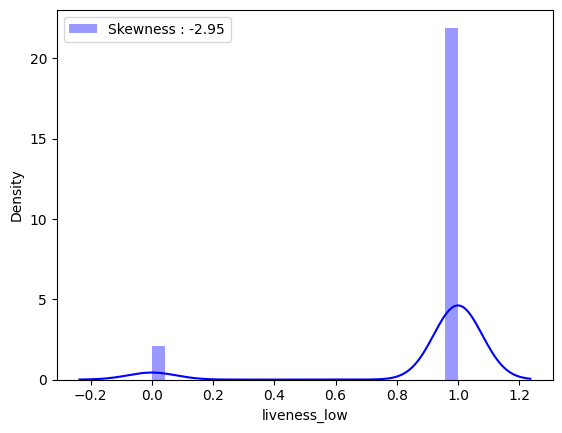

In [12]:
g = sns.distplot(dataset["liveness_low"], color="b", label="Skewness : %.2f"%(dataset["liveness_low"].skew()))
g = g.legend(loc="best")

/var/folders/3r/k6g9zpy93l3903kb2_270qnw0000gn/T/ipykernel_6413/488110115.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset["energy"], color="m", label="Skewness : %.2f"%(dataset["energy"].skew()))


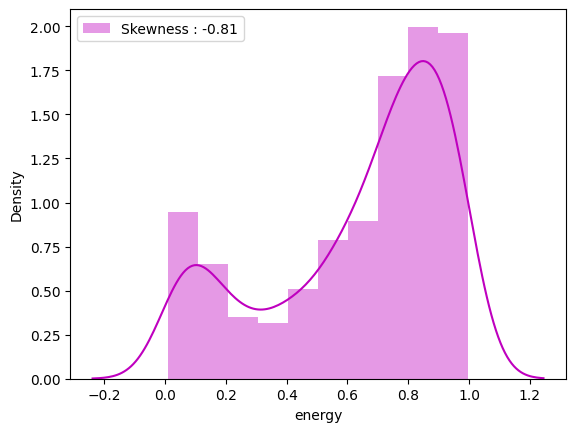

In [13]:
#Explore fair distribution 
g = sns.distplot(dataset["energy"], color="m", label="Skewness : %.2f"%(dataset["energy"].skew()))
g = g.legend(loc="best")

Categorical, 1 if >=0.5, 0 if 0.5.

In [14]:
# Create new feature of instrumentalness
dataset['instrumentalness_low'] = dataset['instrumentalness'].map(lambda s: 1 if s <= 0.5 else 0)
dataset['instrumentalness_high'] = dataset['instrumentalness'].map(lambda s: 1 if s > 0.5 else 0)
dataset.drop(columns=['instrumentalness'],inplace=True)

In [15]:
dataset['danceability_low'] = dataset['danceability'].map(lambda s: 1 if s >= 0.5 else 0)
dataset['danceability_high'] = dataset['danceability'].map(lambda s: 1 if s < 0.5 else 0)

dataset['energy_low'] = dataset['energy'].map(lambda s: 1 if s >= 0.4 else 0)
dataset['energy_high'] = dataset['energy'].map(lambda s: 1 if s < 0.4 else 0)


dataset.drop(columns=['energy'],inplace=True)
dataset.drop(columns=['danceability'],inplace=True)

In [16]:
#Explore fair distribution 
#g = sns.distplot(dataset["instrumentalness"], color="b", label="Skewness : %.2f"%(dataset["instrumentalness"].skew()))
#g = g.legend(loc="best")

/var/folders/3r/k6g9zpy93l3903kb2_270qnw0000gn/T/ipykernel_6413/2892213913.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset["acousticness"], color="m", label="Skewness : %.2f"%(dataset["acousticness"].skew()))


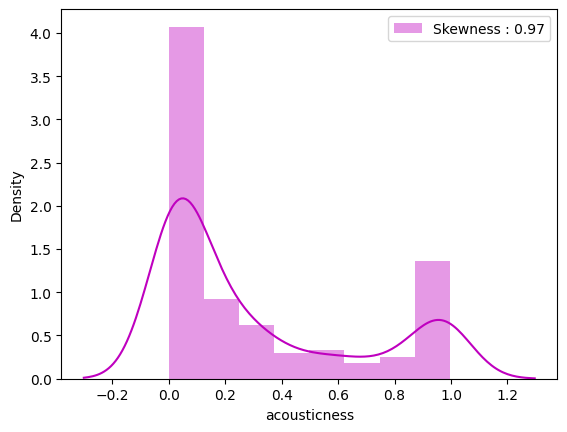

In [17]:
#Explore fair distribution 
g = sns.distplot(dataset["acousticness"], color="m", label="Skewness : %.2f"%(dataset["acousticness"].skew()))
g = g.legend(loc="best")

In [18]:
dataset['acousticness_low'] = dataset['acousticness'].map(lambda s: 1 if s <= 0.4 else 0)
dataset['acoustiness_medium'] = dataset['acousticness'].map(lambda s: 1 if  (s > 0.4 and s <0.8) else 0)
dataset['acousticness_high'] = dataset['acousticness'].map(lambda s: 1 if s >= 0.8 else 0)

dataset.drop(columns=['acousticness'],inplace=True)

In [19]:
dataset['speechiness_low'] = dataset['speechiness'].map(lambda s: 1 if s <= 0.33 else 0)
dataset['speechiness_medium'] = dataset['speechiness'].map(lambda s: 1 if  (s > 0.33 and s <=0.66) else 0)
dataset['speechiness_high'] = dataset['speechiness'].map(lambda s: 1 if s > 0.66 else 0)

dataset.drop(columns=['speechiness'],inplace=True)

/var/folders/3r/k6g9zpy93l3903kb2_270qnw0000gn/T/ipykernel_6413/2893443158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset["speechiness_medium"], color="m", label="Skewness : %.2f"%(dataset["speechiness_medium"].skew()))


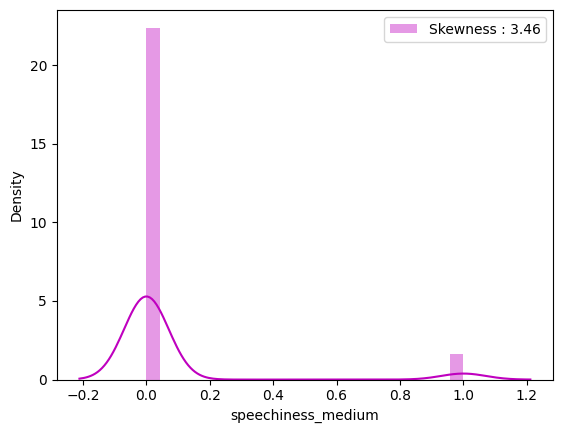

In [20]:
#Explore fair distribution 
g = sns.distplot(dataset["speechiness_medium"], color="m", label="Skewness : %.2f"%(dataset["speechiness_medium"].skew()))
g = g.legend(loc="best")

/var/folders/3r/k6g9zpy93l3903kb2_270qnw0000gn/T/ipykernel_6413/2842346950.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset["loudness"], color="m", label="Skewness : %.2f"%(dataset["loudness"].skew()))


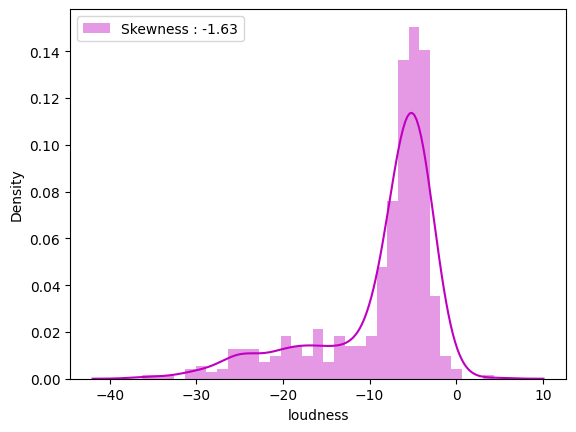

In [21]:
#Explore fair distribution 
g = sns.distplot(dataset["loudness"], color="m", label="Skewness : %.2f"%(dataset["loudness"].skew()))
g = g.legend(loc="best")

In [22]:
dataset['valence_low'] = dataset['valence'].map(lambda s: 1 if s <= 0.4 else 0)
dataset['valence_medium'] = dataset['valence'].map(lambda s: 1 if  (s > 0.4 and s <0.8) else 0)
dataset['valence_high'] = dataset['valence'].map(lambda s: 1 if s >= 0.8 else 0)

dataset.drop(columns=['valence'],inplace=True)

In [23]:
dataset['tempo_low'] = dataset['tempo'].map(lambda s: 1 if s <= 110 else 0)
dataset['tempo_high'] = dataset['tempo'].map(lambda s: 1 if s > 110 else 0)

dataset.drop(columns=['tempo'],inplace=True)

In [24]:
dataset['loudness_low'] = dataset['loudness'].map(lambda s: 1 if s < -10 else 0)
dataset['loudness_high'] = dataset['loudness'].map(lambda s: 1 if s >= -10 else 0)

dataset.drop(columns=['loudness'],inplace=True)

In [25]:
# Split and normalize data
from sklearn.model_selection import train_test_split

### z-score

#dataset['liveness']=(dataset['liveness']-dataset['liveness'].min())/(dataset['liveness'].max()-dataset['liveness'].min())
#dataset['tempo']=(dataset['tempo']-dataset['tempo'].min())/(dataset['tempo'].max()-dataset['tempo'].min())
#dataset['loudness']=(dataset['loudness']-dataset['loudness'].min())/(dataset['loudness'].max()-dataset['loudness'].min())
dataset['key']=(dataset['key']-dataset['key'].min())/(dataset['key'].max()-dataset['key'].min())

# Separate train and test data
train = dataset[:train_len]
test = dataset[train_len:]
test.pop('Label')


#Attribute normalization using Z-score.
y = train.pop('Label')
x_train = train
#x_train, x_test, y, y_test = train_test_split(train, y, test_size=0.2, random_state=None)
#x_mean = x.mean()
#x_std = x.std()
#x_train = (x-x_mean)/x_std

#x_train.describe()

In [26]:
#dataset.describe()

In [27]:
#sns.pairplot(data=dataset[:train_len], vars=df.columns[:-1], hue='Label')

# Model assesmennt

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from itertools import combinations

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

In [29]:
kfold = StratifiedKFold(n_splits=3)

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/homebrew/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are

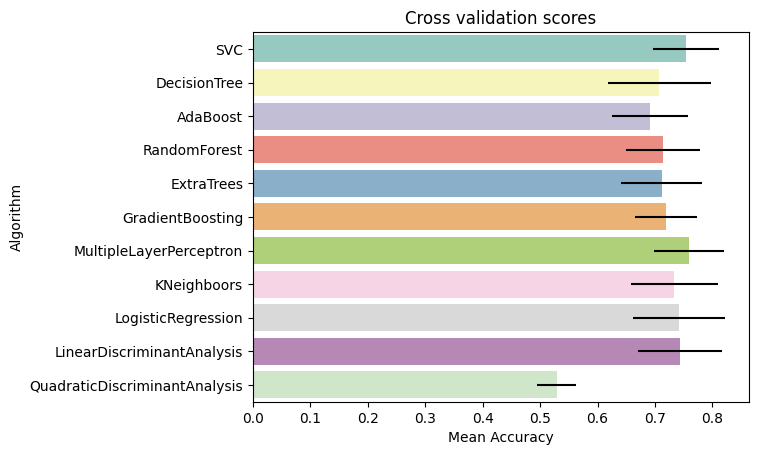

In [30]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(QuadraticDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","QuadraticDiscriminantAnalysis"]})

g = sns.barplot(data = cv_res,x="CrossValMeans",y="Algorithm", palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [31]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": ['log2'],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[50,100],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 1, verbose = 1)

gsRFC.fit(x_train,y)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


0.739616006083072

In [32]:
pred = RFC_best.predict(x_test)
print(classification_report(y_test, pred))

NameError: name 'x_test' is not defined

In [33]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(x_train,y)

ExtC_best = gsExtC.best_estimator_

# Best score
print('Best model:',gsExtC.best_estimator_)
print('Score:',gsExtC.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best model: ExtraTreesClassifier(max_features=1, min_samples_leaf=3, min_samples_split=10,
                     n_estimators=300)
Score: 0.7595760859233914


In [ ]:
pred = ExtC_best.predict(x_test)
print(classification_report(y_test, pred))

In [34]:
#Multilayerpreceptron 
MLPC = MLPClassifier()

layers = [5, 8, 10, 12, (5,5,),(8,8),(10,10),(3,5,3)]
hidden = [x for x in layers]
## Search grid for optimal parameters
ex_param_grid = {"hidden_layer_sizes": hidden,
              "activation": ['logistic'],
              "solver": ['lbfgs', 'adam'],
              "alpha": [0.0001],
              "learning_rate_init": [0.001],
              "max_iter": [200]}


gsMLPC = GridSearchCV(MLPC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 3)

gsMLPC.fit(x_train,y)

MLPC_best = gsMLPC.best_estimator_

#Best score
print('Best model:',gsMLPC.best_estimator_)
print('Score:',gsMLPC.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

Best model: MLPClassifier(activation='logistic', hidden_layer_sizes=5, solver='lbfgs')
Score: 0.7395447200836424


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
pred = MLPC_best.predict(x_test)
print(classification_report(y_test, pred))

In [35]:
#Gradient boosting 

GBC = GradientBoostingClassifier()

ex_param_grid = {"loss": ['log_loss', 'exponential'],
                 "learning_rate": [0.01, 0.1, 1],
                 "max_depth": [1, 2, 5],
                "max_features": [0.3, 0.1] }




gsGBC = GridSearchCV(GBC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(x_train,y)

GBC_best = gsGBC.best_estimator_

#Best score
print('Best model:',gsGBC.best_estimator_)
print('Score:',gsGBC.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best model: GradientBoostingClassifier(loss='exponential', max_depth=2, max_features=0.1)
Score: 0.7555365459557076


In [ ]:
pred = GBC_best.predict(x_test)
print(classification_report(y_test, pred))

In [36]:
# Support vector machine 

# defining parameter range
param_grid = {'C': [1,10,50,100,200,300,1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              } 
  
grid = GridSearchCV(SVC(probability=True), param_grid,cv=kfold,scoring="accuracy", refit = True, verbose = 1)
  
# fitting the model for grid search
grid.fit(x_train, y)

SVMC_best = grid.best_estimator_

# print best parameter after tuning
#print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print('Best model',grid.best_estimator_)
print('Score:', grid.best_score_)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best model SVC(C=10, gamma=0.01, probability=True)
Score: 0.7714927288280582


In [ ]:
pred = SVMC_best.predict(x_test)
print(classification_report(y_test, pred))

In [37]:
from sklearn.model_selection import learning_curve

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

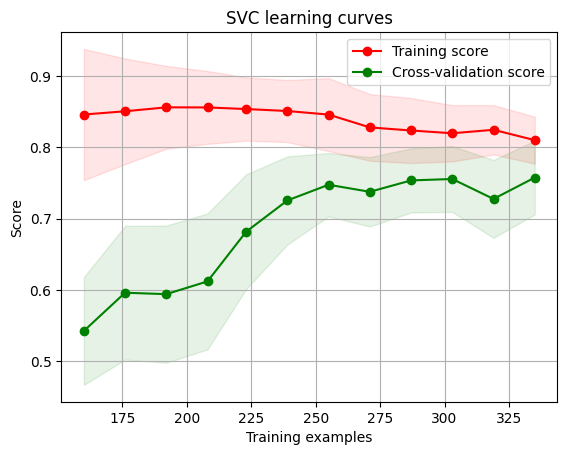

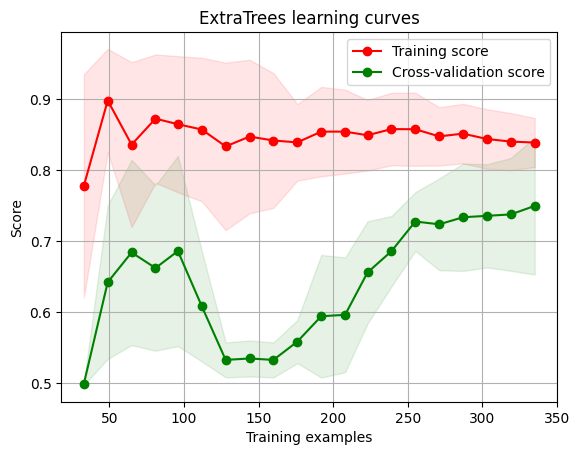

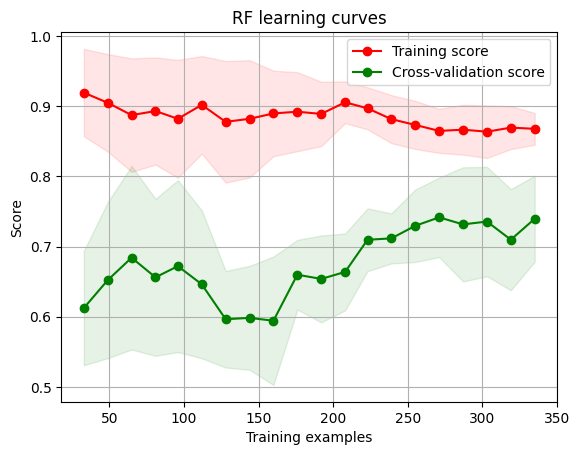

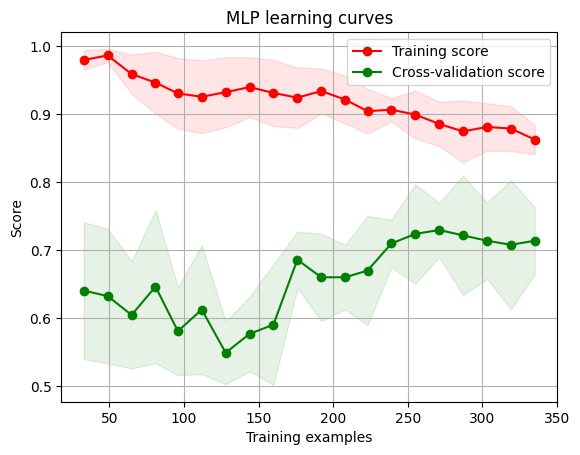

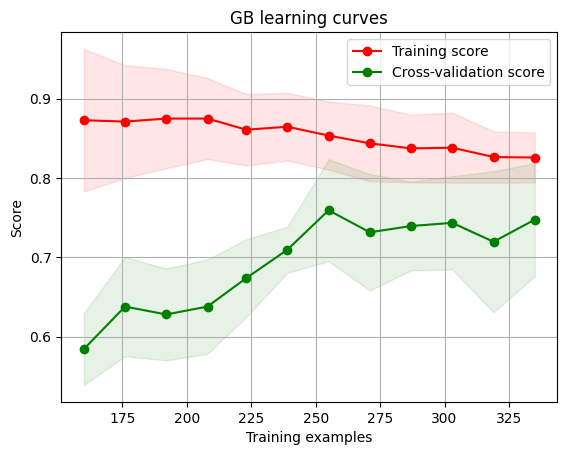

In [38]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 20)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(SVMC_best,"SVC learning curves",x_train,y,cv=kfold)
g = plot_learning_curve(ExtC_best,"ExtraTrees learning curves",x_train,y,cv=kfold)
g = plot_learning_curve(RFC_best,"RF learning curves",x_train,y,cv=kfold)
g = plot_learning_curve(MLPC_best,"MLP learning curves",x_train,y,cv=kfold)
g = plot_learning_curve(GBC_best,"GB learning curves",x_train,y,cv=kfold)

In [ ]:
x_train.head()

In [39]:
results = pd.Series(SVMC_best.predict(test),name="Predictions")
results.to_csv("Gr19_Predictions.csv",index=False)

In [40]:
result = SVMC_best.predict(testestt)
print(result)
ones_ratio=0
zero_ratio=0
for i in result:
    if i==1:
        ones_ratio += 1
    else:
        zero_ratio += 1
print('ratio of 1s: ', ones_ratio/len(result))
print('ratio of 0s: ', zero_ratio/len(result))

[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0.]
ratio of 1s:  0.3466666666666667
ratio of 0s:  0.6533333333333333
[CV 3/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=200, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 2/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=200, solver=adam;, score=0.839 total time=   0.1s
[CV 3/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=200, solver=lbfgs;, score=0.749 total time=   0.1s
[CV 1/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=200, solver=adam;, score=0.542 total time=   0.1s
[CV 3/3] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5